In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# your modules are imported here
from vector_ranker import VectorRanker

In [2]:
# change these to point to actual file paths
DRIVE_PATH = '../data/'
CACHE_PATH = '../cache/'
STOPWORD_PATH = DRIVE_PATH + 'stopwords.txt'
DATASET_PATH = DRIVE_PATH + 'wikipedia_200k_dataset.jsonl.gz'
EDGELIST_PATH = DRIVE_PATH + 'edgelist.csv'
NETWORK_STATS_PATH = DRIVE_PATH + 'network_stats.csv'
DOC2QUERY_PATH = DRIVE_PATH + 'doc2query.csv'
MAIN_INDEX = 'main_index_augmented'
TITLE_INDEX = 'title_index'
RELEVANCE_TRAIN_DATA = DRIVE_PATH + 'hw3_relevance.train.csv'
ENCODED_DOCUMENT_EMBEDDINGS_NPY_DATA = DRIVE_PATH + \
    'wiki-200k-vecs.msmarco-MiniLM-L12-cos-v5.npy'

In [3]:
vector_ranker_MiniLM = VectorRanker('sentence-transformers/msmarco-MiniLM-L12-cos-v5', 
                                    encoded_docs=np.ndarray([]),
                                    row_to_docid=[])

In [4]:
encoded_docs_MiniLM = vector_ranker_MiniLM.encode_docs(DATASET_PATH)

2532it [00:00, 890862.99it/s]
100%|██████████| 200000/200000 [01:26<00:00, 2318.25it/s] 


In [3]:
vector_ranker_multi = VectorRanker('multi-qa-mpnet-base-dot-v1', 
                                    encoded_docs=np.ndarray([]),
                                    row_to_docid=[])

In [4]:
encoded_docs_multi = vector_ranker_multi.encode_docs(DATASET_PATH)

2532it [00:00, 922353.46it/s]
100%|██████████| 200000/200000 [02:25<00:00, 1374.54it/s] 


In [3]:
vector_ranker_msmarco = VectorRanker('msmarco-distilbert-dot-v5',
                                     encoded_docs=np.ndarray([]),
                                     row_to_docid=[])

In [4]:
encoded_docs_msmarco = vector_ranker_msmarco.encode_docs(DATASET_PATH)

2532it [00:00, 333395.42it/s]
100%|██████████| 200000/200000 [01:35<00:00, 2101.76it/s] 


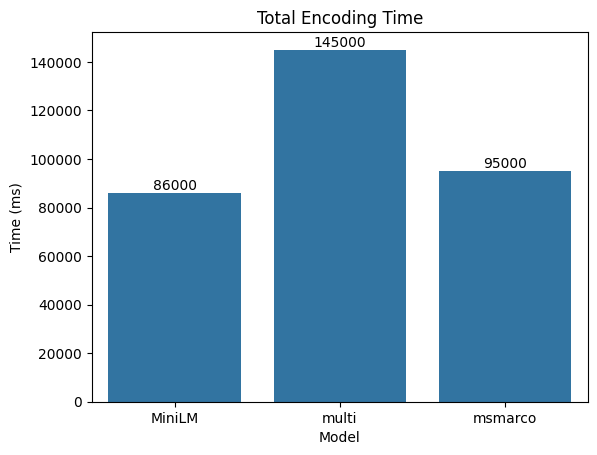

In [21]:
data = [86000, 145000, 95000]
df = pd.DataFrame({'Model': ['MiniLM', 'multi', 'msmarco'], 'Time (ms)': data})
plot = sns.barplot(data=df, x='Model', y='Time (ms)')
plot.set(xlabel='Model', ylabel='Time (ms)')
plot.bar_label(plot.containers[0])
plot.set_title('Total Encoding Time')
plt.show()